<a href="https://colab.research.google.com/github/viosagara347/mdsim_final/blob/master/mdsim_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Simple COVID-19 Spreading Simulation Using Four Directional Random Walk__ 
`# Hello World.. Rookie Here >//< I'd like to apologize for every mistake that I've made during a creation. Therefore,`
> “Live as if you were to die tomorrow. Learn as if you were to live forever.” 
__Mahatma Gandhi__

*Warmest Regards From viosagara347. Code Writing Style Inspired By [mlcourse.ai/jupyter_english/tutorials Yorko GitHub Repository](https://github.com/Yorko/mlcourse.ai/tree/master/jupyter_english/tutorials) and [notebooks/A short study of Rényi entropy Naereen GitHub Repository](https://github.com/Naereen/notebooks/blob/master/A_short_study_of_Renyi_entropy.ipynb).*

## __First things first, we initialize the environment:__

#### Packages installation

In [0]:
!pip install watermark matplotlib numpy

In [0]:
!pip install py-cpuinfo

#### Packages importing

In [0]:
# Import Required Modules
import pandas as pd
import numpy as np
import scipy as sp

# Import Plotting Modules And Set Up
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [0]:
%load_ext watermark
%watermark -v -m -a "viosagara347" -g -p matplotlib,pandas,numpy,scipy,seaborn 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
viosagara347 

CPython 3.6.9
IPython 5.5.0

matplotlib 3.2.1
pandas 1.0.3
numpy 1.18.3
scipy 1.4.1
seaborn 0.10.1

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.104+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
Git hash   :


In [5]:
# Google Colab CPU Specs
import cpuinfo
print('cpuinfo_brand:', cpuinfo.get_cpu_info()['brand'])
print('cpuinfo_model:', cpuinfo.get_cpu_info()['model'])
print('cpuinfo_family:', cpuinfo.get_cpu_info()['family'])
print('cpuinfo_flags:', cpuinfo.get_cpu_info()['flags'])

cpuinfo_brand: Intel(R) Xeon(R) CPU @ 2.30GHz
cpuinfo_model: 63
cpuinfo_family: 6
cpuinfo_flags: ['abm', 'aes', 'apic', 'arat', 'arch_capabilities', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'cmov', 'constant_tsc', 'cpuid', 'cx16', 'cx8', 'de', 'erms', 'f16c', 'fma', 'fpu', 'fsgsbase', 'fxsr', 'ht', 'hypervisor', 'ibpb', 'ibrs', 'invpcid', 'invpcid_single', 'lahf_lm', 'lm', 'mca', 'mce', 'md_clear', 'mmx', 'movbe', 'msr', 'mtrr', 'nonstop_tsc', 'nopl', 'nx', 'osxsave', 'pae', 'pat', 'pcid', 'pclmulqdq', 'pdpe1gb', 'pge', 'pni', 'popcnt', 'pse', 'pse36', 'rdrand', 'rdrnd', 'rdtscp', 'rep_good', 'sep', 'smep', 'ss', 'ssbd', 'sse', 'sse2', 'sse4_1', 'sse4_2', 'ssse3', 'stibp', 'syscall', 'tsc', 'tsc_adjust', 'tsc_known_freq', 'vme', 'x2apic', 'xsave', 'xsaveopt', 'xtopology']


#### Seaborn visual analysis set up

In [0]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

## __Preliminary__

> The process of spreading a disease / virus can be simulated in a manner
simple by using Random Walk. In this method, each individual
represented as randomly moving particles. Simulation process
begins by defining a number of individuals from a community that already
infected. After that, the simulation is done by defining changes in position
from each individual randomly. Simply put, the infection process occurs
when a healthy individual is in the same position as an individual
infected. In addition, individuals who have recovered are assumed to have immunity against
disease / virus so that it won't get infected a second time. Simulation process
ended after there were no more infected individuals.

>In more detail, the simulation space needs to be defined to avoid
individual movements that are too diffuse. Related to this, the individual who
moving beyond the boundary area needs to be controlled by using the Periodic Boundary Condition (*PBC*) method. In addition, the application of regional quarantine at certain levels
can be represented by probability variable defining 
of an individual to move. The simulation results can show
fluctuations in the number of infected individuals each day and the time required by
community to recover from a disease / virus outbreak or no more individual
infected. In this case, one iteration is assumed to be one day.

__*Translated By Google Translate*__, _edited by viosagara347_

#### Fun Sized Task Lists 

- [ ] Randomize Moving Particles
- [ ] Initialize and Randomize Position Of Infected Individuals
- [ ] Put Healthy Individual In The Same Position With Infected Ones
- [ ] Recovered Individuals Have Immunity Against Disease / Virus
- [ ] Define Simulation Space Boundary Area
- [ ] Individual Controls Using Periodic Boundary Condition (*PBC*) Method
- [ ] Represent Regional Quarantine By Probability Variable Defining
- [ ] Plot Infected Individuals Fluctuation, And Recovery Time Needs
- [ ] One Day One Iteration Until Zero Infections Occurs


> ### *Petunjuk*

> ---



> B. Algoritma

>Algoritma: Penyebaran penyakit/virus dengan Random Walk
1. Inisialisasi variabel scalar
- jumlah individu
- rasio individu yang terinfeksi
- waktu pemulihan
- ukuran ruang simulasi
- probabilitas individu bergerak
2. Inisialisasi variabel list
- posisi masing-masing individu
- status kesehatan individu (individu dengan rasio tertentu berstatus terinfeksi)
- status imunitas individu
- waktu terinfeksi individu
3. Iterasi
- Selama jumlah individu terinfeksi > 0:
 - Untuk setiap individu:
 - Update posisi berdasarkan probabilitas individu bergerak
 - Koreksi posisi dengan PBC
 - Update waktu terinfeksi untuk individu yang sudah terinfeksi.
 - Update status kesehatan individu - recovery
   - Jika waktu terinfeksi > waktu pemulihan, maka individu yang 
terinfeksi didefinisikan pulih
 - Update status imun individu (individu yang sudah pulih memiliki imun 
sehingga tidak akan terinfeksi lagi)
 - Update status kesehatan individu – infection
   - Hitung jarak individu sehat dengan individu terinfeksi
   - Jika jarak individu sehat sama dengan individu terinfeksi dan 
individu tersebut belum memiliki imun, maka individu sehat 
tersebut terinfeksi
 - Hitung dan simpan jumlah individu terinfeksi

> C. Instruksi Tugas

> Buatlah simulasi penyebaran penyakit/virus dengan menggunakan **Random Walk 4 
Arah** dengan menggunakan variabel-variabel berikut:
* - Jumlah individu: 200
  - Rasio individu terinfeksi: 5%
  - Probabilitas individu bergerak: 80%
  - Waktu pemulihan: 10 hari
  - Ukuran ruang simulasi: 20 x 20 unit
1. Challenge 1 (80 poin)
- Lakukan simulasi dan buatlah plot jumlah individu yang terinfeksi tiap harinya.
- Tentukan waktu pemulihan yang diperlukan oleh komunitas tersebut.
2. Challenge 2 (20 poin)
- Buatlah video dari simulasi tersebut dan berikan pembeda (misal: warna) untuk 
individu yang sehat dan individu yang terinfeksi.



## __The Algorithm Has Begun__

#### ***Mostly From Lecturer's Slide***

In [0]:
# Scalar Variable Initialization
n_individual = 200
# n_iter = 200 Not Defined. Until Zero Infections For Sure.
infectedratio = .05
movingprob = .80
recovtime = 10

# Define Simulation Space
x_min = 0 # Minimum Value Of X
x_max = 20 # Maximum Value Of X
y_min = 0 # Minimum Value Of Y
y_max = 20 # Maximum Value Of Y
x_range = x_max - x_min
y_range = y_max - y_min

# List Variable Initialization
individuals_list = [ ]

In [0]:
# Define Initial Position
# Using Numpy's Random Uniform To Generate Default Low 0 and High 1 Random
for i in range (n_individual):
  rand_x = int(np.random.uniform(x_min, x_max)) # X Position Of i-th Particle
  rand_y = int(np.random.uniform(y_min, y_max)) # Y Position Of i-th Particle
  individuals_list.append([(rand_x, rand_y)])

In [0]:
# individuals_list

In [0]:
# Update Position
def update_position(rand, pos):
  x, y = pos
  # Right
  if rand <= .25:
    x = x + 1
  # Down
  elif rand <= .50:
    y = y - 1
  # Left 
  elif rand <= .75:
    x = x - 1
  # Up
  else:
    y = y + 1
  return x, y

In [0]:
# Periodic Boundary Conditiion
# Correction Of X Axis
def pbc(x, y):
  if x > x_max:
    x = x - x_range
  if x < x_min:
    x = x + x_range
# Correction Of Y Axis
  if y > y_max:
    y = y - y_range
  if y < y_min:
    y = y + y_range
  return x, y

In [0]:
# # Pseudocode: Random Walk 2D 4 Direction
# # Initialization
# n_particle # Number Of Particle
# # initialization
# n_particle     # number of particle
# n_iter           # number of iteration
# x_pos            # initial position of x
# y_pos            # initial position of y

# for i in range(n_iter-1):
#   for n in range(n_particle):
#     rand = np.random.rand()
#     new_x, new_y = update_pos(rand, pos_list[n][-1])
#     new_x, new_y = pbc(new_x, new_y)
#     pos_list[n].append((new_x, new_y))

# # iteration
# for i = 1:n_iter
#        for j = 1:n_particle
# # generate rand 
# rand()          # random number
# # update x and y position based on 
# # the defined probability
# x_pos[n,i+1] = x_pos[n,i] + dx
# y_pos [n,i+1] = x_pos [n,i] + dy
# # update position
# rand = [0 ~ 1]      # random number
# # right
# if rand <= 0. 25:
#      x = x + 1
# # down
# else if rand <= 0.50:
#      y = y - 1
# # left
# else if rand <= 0.75:
#      x = x - 1
# # up
# else :
#      y = y + 1

# # perform pbc correction
# store new position



In [0]:
# PLT Side To Side Animations


#### ***From Zoom Class Meeting***

In [0]:
colors = ['blue', 'red', 'orange']

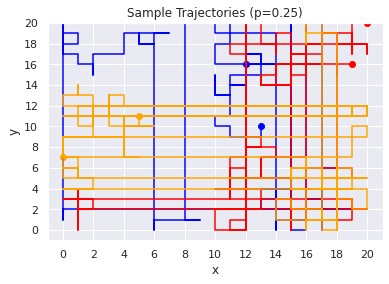

In [0]:
for n in range(n_particle):
  x = [a[0] for a in pos_list[n]]
  y = [a[1] for a in pos_list[n]]
  plt.plot(x, y, c=colors[n])
  plt.scatter(x[0], y[0], c=colors[n])
  plt.scatter(x[-1], y[-1], c=colors[n])
  plt.xlim(x_min-1, x_max+1)
  plt.ylim(y_min-1, y_max-1)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xticks(range(0, 21, 2), range(0, 21, 2))
  plt.yticks(range(0, 21, 2), range(0, 21, 2))
  plt.title('Sample Trajectories (p={})'.format(prob))
 # plt.savefig('traj_sample_p{}.png'.format(prob), format='png', dpi=1000, bbox_inches="tight")

In [0]:
# !pip install opencv-python

In [0]:
# !pip install pygame

     |████████████████████████████████| 11.4MB 2.8MB/s 


In [0]:
#from cv2 import Camera
#from SimpleCV import Camera
fig = plt.figure()
camera = Camera(fig)


for i in range(len(pos_list[0])-1):
  for n in range(n_particle):
    x = [a[0] for a in pos_list[n][:i+1]]
    y = [a[1] for a in pos_list[n][:i+1]]
  #  plt.plot(x, y, c=colors[n])
    plt.scatter(x[-1], y[-1], c=colors[n])
    plt.xlim(x_min-1, x_max+1)
    plt.ylim(y_min-1, y_max+1)
    plt.xlabel('x')
    plt.ylabel('y')

NameError: ignored

<Figure size 432x288 with 0 Axes>

# **Experimental**

AttributeError: ignored

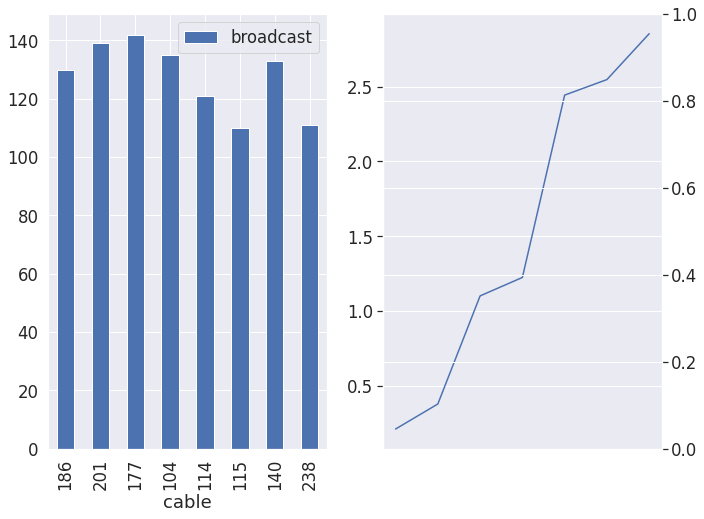

In [0]:
fig = plt.figure()
df1 = pd.DataFrame({"broadcast": np.random.randint(110, 150,size=8), 
                   "cable": np.random.randint(100, 250, size=8),
                   "streaming" : np.random.randint(10, 50, size=8)}, 
                   index=pd.Series(np.arange(2009,2017),name='year'))
ax1 = fig.add_subplot(121)
df1.plot.bar(x='cable', y='broadcast', stacked=True,ax=ax1)

df2 = pd.DataFrame({'usage': np.sort(np.random.randint(1,50,size=7)), 
                    'avg_hour': np.sort(np.random.randint(0,3, size=7) + np.random.ranf(size=7))},
                      index=pd.Series(np.arange(2009,2016),name='year'))

ax2 = fig.add_subplot(122)
ax2.plot(df2['avg_hour'])

ax3 = ax2.twinx()
ax3.bar(x='avg_hour',left=range(2009,2016),height=df2['usage'])

plt.show()

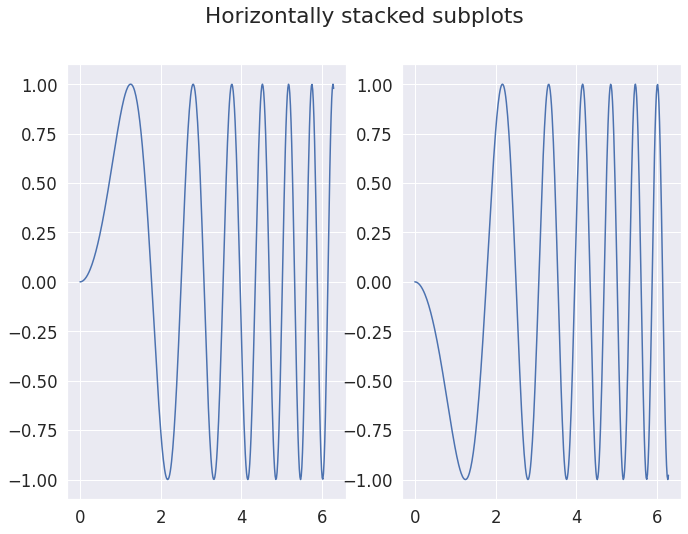

In [0]:
# Some example data to display
xii = np.linspace(0, 2 * np.pi, 400)
yii = np.sin(x ** 2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(xii, yii)
ax2.plot(xii, -yii)

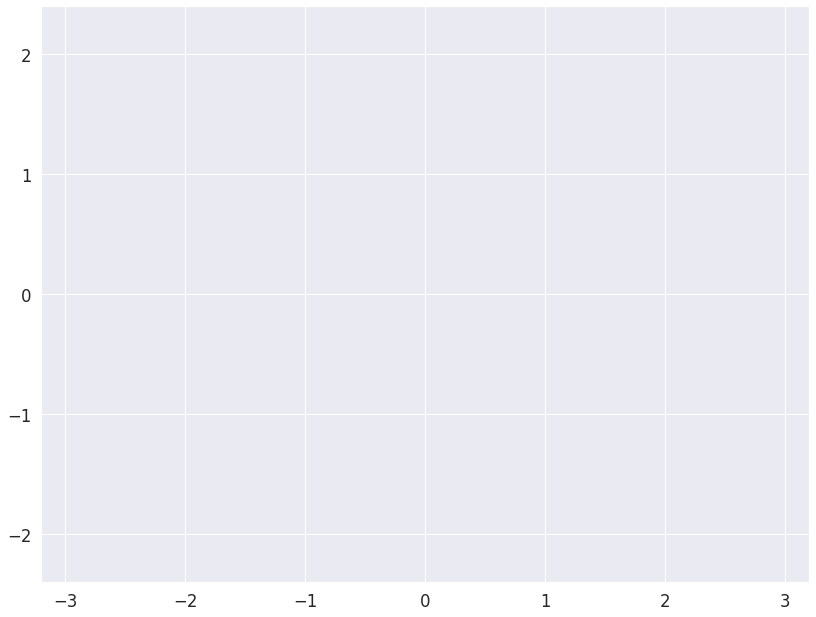

In [0]:
"""
Animation of Elastic collisions with Gravity

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

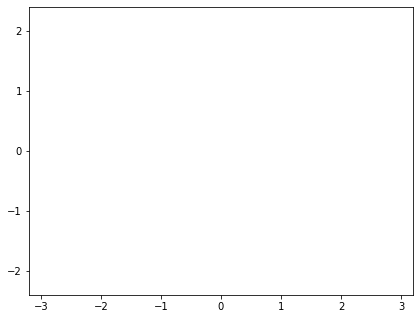

In [2]:
"""
Animation of Elastic collisions with Gravity

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
%matplotlib inline
class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
